In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

def linear_function(x, a, b):
    return a * x + b

In [2]:
df = pd.read_csv('../../data/SEU-net_using18k_withoutCorticalLayers.csv', 
                 sep=',', index_col=0)

df

,AAA,ACAd,ACAv,ACB,AId,AIp,AIv,AM,AON,AUDd,...,VISli,VISp,VISpm,VISpor,VISrl,VM,VPL,VPLpc,VPM,VPMpc
AAA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
ACAd,0.000000,2.081681,1.439932,0.000000,0.000000,0.000000,0.000000,4.403977,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.856040,0.000000,0.00000,0.000000,0.000000
ACAv,0.000000,2.321019,3.599903,0.000000,0.000000,0.000000,0.000000,0.309392,0.000000,0.000000,...,0.000000,0.000000,0.243376,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
ACB,0.000000,0.000000,0.000000,1.613697,0.000000,0.000000,0.000000,0.000000,1.433759,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
AId,0.699578,0.900361,0.452350,0.465499,1.262479,0.723555,0.846864,0.000000,0.490918,0.000000,...,0.578264,1.479938,0.000000,1.173375,0.000000,0.563808,0.000000,0.00000,0.000000,0.588921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VM,0.000000,0.855781,0.000000,0.000000,1.257696,0.000000,1.456868,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.439599,0.000000,0.00000,0.541271,0.000000
VPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.906699,...,0.000000,0.000000,0.492996,0.000000,2.973965,0.000000,0.785467,0.00000,0.661191,0.000000
VPLpc,0.000000,0.000000,0.000000,0.000000,0.477051,0.676976,0.000000,0.000000,0.000000,0.593970,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500760,0.00000,0.695614,0.000000
VPM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.597248,...,0.000000,2.619676,0.000000,0.000000,1.643838,1.039381,0.833687,0.00000,0.707661,0.000000


In [3]:
receive_df = df.sum(axis=0)
receive_df = pd.DataFrame(receive_df, columns=['receive_strength'])
receive_df

,receive_strength
AAA,8.616527
ACAd,31.817244
ACAv,28.239647
ACB,26.916678
AId,28.613881
...,...
VM,16.671255
VPL,30.110969
VPLpc,11.957767
VPM,26.862137


In [4]:
den_contact = pd.read_csv('../../data/ppss_from_pacs.csv', sep=',', index_col=0)

den_contact.loc[:, 'count'] = 1

synapse_df = den_contact.pivot_table(index='target_region', columns=['branch_level'], 
                        values=['count'], aggfunc='sum', fill_value=0
                       )

synapse_df.columns.name = ''
synapse_df.columns = [i[1] for i in synapse_df.columns]
synapse_df.index.name = ''
synapse_df

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
,,,,,,,,,,,,,,,,,,,,,
AAA,144,673,853,823,829,399,335,121,55,26,...,0,0,0,0,0,0,0,0,0,0
ACAd,3665,11133,22013,31999,32171,25411,19162,12339,6836,4134,...,142,29,0,0,0,0,0,0,0,0
ACAv,3036,8519,15984,19129,19563,17962,13964,9883,5966,3474,...,198,45,84,26,22,0,0,0,0,0
ACB,35287,113875,214127,286363,289798,236846,164850,94084,49795,25866,...,1258,329,165,126,14,0,0,0,0,0
ADP,0,4,51,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XII,0,22,10,8,38,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Xi,163,852,1903,3723,3503,2551,1331,864,468,158,...,0,0,0,0,0,0,0,0,0,0
ZI,773,2324,4906,9538,9955,10205,7796,4704,3173,2058,...,120,1,0,0,0,0,0,0,0,0


In [5]:
tmp_index = []
for i in synapse_df.index:
    if i in list(receive_df.index):
        tmp_index.append(i)

synapse_df = synapse_df.loc[tmp_index]
receive_df = receive_df.loc[tmp_index]

In [6]:
receive_df

,receive_strength
AAA,8.616527
ACAd,31.817244
ACAv,28.239647
ACB,26.916678
AId,28.613881
...,...
VM,16.671255
VPL,30.110969
VPLpc,11.957767
VPM,26.862137


In [7]:
synapse_df

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
,,,,,,,,,,,,,,,,,,,,,
AAA,144,673,853,823,829,399,335,121,55,26,...,0,0,0,0,0,0,0,0,0,0
ACAd,3665,11133,22013,31999,32171,25411,19162,12339,6836,4134,...,142,29,0,0,0,0,0,0,0,0
ACAv,3036,8519,15984,19129,19563,17962,13964,9883,5966,3474,...,198,45,84,26,22,0,0,0,0,0
ACB,35287,113875,214127,286363,289798,236846,164850,94084,49795,25866,...,1258,329,165,126,14,0,0,0,0,0
AId,13637,39737,72846,98192,106306,90199,64593,38409,21471,10837,...,382,145,92,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VM,1266,4916,10949,18066,24360,25883,22083,17962,10437,5787,...,136,99,9,0,0,0,0,0,0,0
VPL,445,2387,3129,2718,3789,3710,2792,2853,1707,856,...,87,9,0,0,0,0,0,0,0,0
VPLpc,32,21,38,49,104,48,86,105,38,39,...,0,0,0,0,0,0,0,0,0,0


In [8]:
tmp_ct = synapse_df.sum(axis=1)
receive_df = pd.concat([receive_df, tmp_ct], axis=1)
receive_df.columns = list(receive_df.columns)[:-1] + ['#ppss']

receive_df

,receive_strength,#ppss
AAA,8.616527,4327
ACAd,31.817244,172320
ACAv,28.239647,120662
ACB,26.916678,1534740
AId,28.613881,564978
...,...,...
VM,16.671255,147300
VPL,30.110969,25132
VPLpc,11.957767,570
VPM,26.862137,53858


In [9]:
receive_df['log_ppss'] = np.log2(receive_df['#ppss'])
receive_df['log_receive_strength'] = np.log2(receive_df['receive_strength'])

receive_df

,receive_strength,#ppss,log_ppss,log_receive_strength
AAA,8.616527,4327,12.079151,3.107106
ACAd,31.817244,172320,17.394731,4.991737
ACAv,28.239647,120662,16.880612,4.819650
ACB,26.916678,1534740,20.549563,4.750428
AId,28.613881,564978,19.107835,4.838643
...,...,...,...,...
VM,16.671255,147300,17.168398,4.059291
VPL,30.110969,25132,14.617238,4.912217
VPLpc,11.957767,570,9.154818,3.579876
VPM,26.862137,53858,15.716873,4.747502


In [10]:
x = receive_df['log_ppss']
y = receive_df['log_receive_strength']

params, covariance = curve_fit(linear_function, x, y)
a, b = params
x_fit = np.linspace(min(x)-1, max(x)+5, 100)
y_fit = linear_function(x_fit, a, b)

PearsonRResult(statistic=0.49635805923120424, pvalue=7.544694055926981e-07)


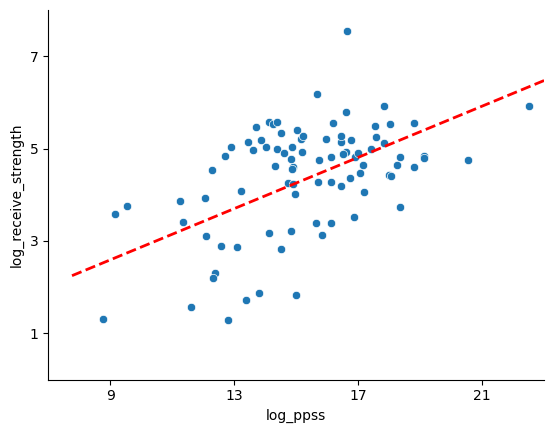

In [11]:
print(stats.pearsonr(receive_df['log_ppss'], receive_df['log_receive_strength']))
sns.scatterplot(data=receive_df,x='log_ppss', y='log_receive_strength')

plt.plot(x_fit, y_fit, color='red', 
         linewidth=2, linestyle='--',
         label='Fitted Curve')

plt.xlim([7., 23])
plt.ylim([0, 8.])
plt.xticks([9, 13, 17, 21, ])
plt.yticks([1, 3, 5, 7])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('./cmp_seu_net.svg', bbox_inches='tight')